In [1]:
# %load_ext autoreload
# %autoreload 2

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

/scratch/tmp/ipykernel_78571/76982998.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('raw_data/downloads_study757_mapped_rpk_filtered.csv')

In [3]:
first_parts = [col.split('_', 1)[0] for col in data.columns]
pd.Series(first_parts).value_counts()

POI-Bergithe        149
POI-AAD-Bergithe     88
Ovarian              73
HealthyCtrl          52
ROHHAD               46
MockIP               38
Canary               28
PosCtrl               6
peptide               1
Name: count, dtype: int64

In [4]:
# Search for columns containing 'ag' (case insensitive)
columns_with_ag = [col for col in data.columns if 'ag' in col.lower()]
print(columns_with_ag)


['MockIP_AG10_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H7_S379_R1_001', 'MockIP_AG11_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H8_S380_R1_001', 'MockIP_AG12_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H9_S381_R1_001', 'MockIP_AG13_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H10_S382_R1_001', 'MockIP_AG14_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H11_S383_R1_001', 'MockIP_AG15_POI_Bergithe_Rerun_Oct_13_2025_Plate4_H12_S384_R1_001', 'MockIP_AG16_POI_Bergithe_Rerun_Oct_13_2025_Plate5_B12_S408_R1_001', 'MockIP_AG17_POI_Bergithe_Rerun_Oct_13_2025_Plate5_D12_S432_R1_001', 'MockIP_AG18_POI_Bergithe_Rerun_Oct_13_2025_Plate5_H1_S469_R1_001', 'MockIP_AG19_POI_Bergithe_Rerun_Oct_13_2025_Plate5_H2_S470_R1_001', 'MockIP_AG1_POI_Bergithe_Rerun_Oct_13_2025_Plate1_D10_S46_R1_001', 'MockIP_AG20_POI_Bergithe_Rerun_Oct_13_2025_Plate5_H3_S471_R1_001', 'MockIP_AG21_POI_Bergithe_Rerun_Oct_13_2025_Plate5_H4_S472_R1_001', 'MockIP_AG22_POI_Bergithe_Rerun_Oct_13_2025_Plate5_H5_S473_R1_001', 'MockIP_AG23_POI_Bergithe_Rerun_Oct_13_2025

In [5]:
# Keep only columns that contain ROHHAD_NID624, Canary, HealthyCtrl, or MockIP (anywhere in the column name)
desired_keywords = ['ROHHAD_NID624', 'Canary', 'HealthyCtrl', 'MockIP']
columns_to_keep = [col for col in data.columns if any(keyword in col for keyword in desired_keywords)]

# Always include the peptide identifier column (assume it's named 'peptide')
if 'peptide' in data.columns:
    columns_to_keep = ['peptide'] + [col for col in columns_to_keep if col != 'peptide']

# Filter the data frame and set peptide names as the index so row names stay as peptide names
filtered_data = data[columns_to_keep].copy()
if 'peptide' in filtered_data.columns:
    filtered_data = filtered_data.set_index('peptide')

filtered_data.head()


,Canary_Canary10_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E6_S438_R1_001,Canary_Canary11_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E7_S439_R1_001,Canary_Canary12_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E8_S440_R1_001,Canary_Canary13_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E9_S441_R1_001,Canary_Canary14_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E10_S442_R1_001,Canary_Canary15_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E11_S443_R1_001,Canary_Canary16_POI_Bergithe_Rerun_Oct_13_2025_Plate5_E12_S444_R1_001,Canary_Canary17_POI_Bergithe_Rerun_Oct_13_2025_Plate5_F1_S445_R1_001,Canary_Canary18_POI_Bergithe_Rerun_Oct_13_2025_Plate5_F2_S446_R1_001,Canary_Canary19_POI_Bergithe_Rerun_Oct_13_2025_Plate5_F3_S447_R1_001,...,MockIP_HC49_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H5_S185_R1_001,MockIP_HC50_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H6_S186_R1_001,MockIP_HC51_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H7_S187_R1_001,MockIP_HC52_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H8_S188_R1_001,MockIP_HC53_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H9_S189_R1_001,MockIP_HC54_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H10_S190_R1_001,MockIP_HC55_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H11_S191_R1_001,MockIP_HC56_POI_Bergithe_Rerun_HealthyCtrl_Plate2_H12_S192_R1_001,ROHHAD_NID624_09262025_rep1_POI_Bergithe_Rerun_Oct_13_2025_Plate5_B7_S403_R1_001,ROHHAD_NID624_09262025_rep1_POI_Bergithe_Rerun_Oct_13_2025_Plate5_D7_S427_R1_001
peptide,,,,,,,,,,,,,,,,,,,,,
gi|310923116|ref|NP_001185608.1|_protein_CBFA2T1_isoform_F_[Homo_sapiens]_fragment_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.279865,0.0,0.0,0.0,1.270538,0.0,0.0,0.404187,0.0,0.0
gi|578803866|ref|XP_006712407.1|_PREDICTED:_coiled-coil_domain-containing_protein_138_isoform_X2_[Homo_sapiens]_fragment_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
gi|115648063|ref|NP_001070253.1|_Y+L_amino_acid_transporter_2_[Homo_sapiens]_fragment_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
gi|574271031|ref|NP_001276019.1|_zinc_finger_MYM-type_protein_1_isoform_a_[Homo_sapiens]_fragment_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
gi|767882649|ref|XP_011535139.1|_PREDICTED:_mucin-5AC-like_[Homo_sapiens]_fragment_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.684113,0.0,0.0


In [6]:
# The task is to compute the mean across MockIP ag samples, then use that to normalize HealthyCtrl and ROHHAD_NID624 columns.
# After normalization, compute log fold change, adding a pseudo count to avoid log(0).

pseudo_count = 1e-3  # Small value to avoid division by zero and taking log(0)

# 1. Find all MockIP columns (ag beads), HealthyCtrl, and ROHHAD_NID624 columns
mockip_cols = [col for col in filtered_data.columns if 'MockIP' in col and 'ag' in col.lower()]
healthy_cols = [col for col in filtered_data.columns if 'HealthyCtrl' in col]
rohhad_cols = [col for col in filtered_data.columns if 'ROHHAD_NID624' in col]

# 2. Compute the mean across mockIP ag columns for each peptide (row-wise)
mockip_mean = filtered_data[mockip_cols].mean(axis=1)

# 3. For each sample type, normalize their signal by the mockIP mean and take log2 with a pseudo-count
# To avoid SettingWithCopyWarning, use .loc accessor explicitly
for col in healthy_cols:
    filtered_data.loc[:, f'{col}_log2fc_over_mockip'] = np.log2((filtered_data[col] + pseudo_count) / (mockip_mean + pseudo_count))

for col in rohhad_cols:
    filtered_data.loc[:, f'{col}_log2fc_over_mockip'] = np.log2((filtered_data[col] + pseudo_count) / (mockip_mean + pseudo_count))


In [7]:
# ============================================================================
# LABEL CLEANING: Create clean protein names for all peptides (run once)
# ============================================================================
# This function cleans the NCBI-style peptide headers into readable protein names.
# Applied once to the dataframe; all downstream plots use these clean labels.

import re

def clean_peptide_label(raw_label):
    """
    Convert NCBI-style peptide header to readable protein name.
    
    Example:
        'gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_sapiens]_fragment_11'
        -> 'ELAV-like protein 4'
    
    Parameters:
        raw_label: str - The raw peptide identifier from the FASTA/data file
    
    Returns:
        str - Clean, readable protein name
    """
    # Get the part after the last pipe
    name = raw_label.split('|')[-1] if '|' in raw_label else raw_label
    name = name.lstrip('_')
    
    # Remove common uninformative prefixes
    name = re.sub(r'^(PREDICTED:?|putative|probable)_?', '', name, flags=re.IGNORECASE)
    
    # Remove species bracket and everything after
    name = re.sub(r'\s*\[Homo_sapiens\].*', '', name, flags=re.IGNORECASE)
    name = re.sub(r'\s*\[.*', '', name)
    
    # Remove isoform and fragment info
    name = re.sub(r'_isoform_\w+', '', name, flags=re.IGNORECASE)
    name = re.sub(r'_fragment_\d+', '', name, flags=re.IGNORECASE)
    
    # Replace underscores with spaces
    name = name.replace('_', ' ')
    
    # Clean up whitespace
    name = ' '.join(name.split()).strip()
    
    # Capitalize first letter
    if name:
        name = name[0].upper() + name[1:] if len(name) > 1 else name.upper()
    
    return name

# Apply to all peptides in filtered_data and store as a new column
# Create a mapping dictionary for easy lookup
peptide_to_clean_label = {idx: clean_peptide_label(idx) for idx in filtered_data.index}

# Add clean_label as a column for convenience
filtered_data['clean_label'] = filtered_data.index.map(peptide_to_clean_label)

# Show examples
print("Label cleaning examples:")
print("-" * 80)
for raw, clean in list(peptide_to_clean_label.items())[:5]:
    print(f"Raw:   {raw[:70]}...")
    print(f"Clean: {clean}")
    print()

print(f"Total peptides with clean labels: {len(peptide_to_clean_label)}")


Label cleaning examples:
--------------------------------------------------------------------------------
Raw:   gi|310923116|ref|NP_001185608.1|_protein_CBFA2T1_isoform_F_[Homo_sapie...
Clean: Protein CBFA2T1

Raw:   gi|578803866|ref|XP_006712407.1|_PREDICTED:_coiled-coil_domain-contain...
Clean: Coiled-coil domain-containing protein 138

Raw:   gi|115648063|ref|NP_001070253.1|_Y+L_amino_acid_transporter_2_[Homo_sa...
Clean: Y+L amino acid transporter 2

Raw:   gi|574271031|ref|NP_001276019.1|_zinc_finger_MYM-type_protein_1_isofor...
Clean: Zinc finger MYM-type protein 1

Raw:   gi|767882649|ref|XP_011535139.1|_PREDICTED:_mucin-5AC-like_[Homo_sapie...
Clean: Mucin-5AC-like

Total peptides with clean labels: 3080


Scatter plot saved as PNG and SVG


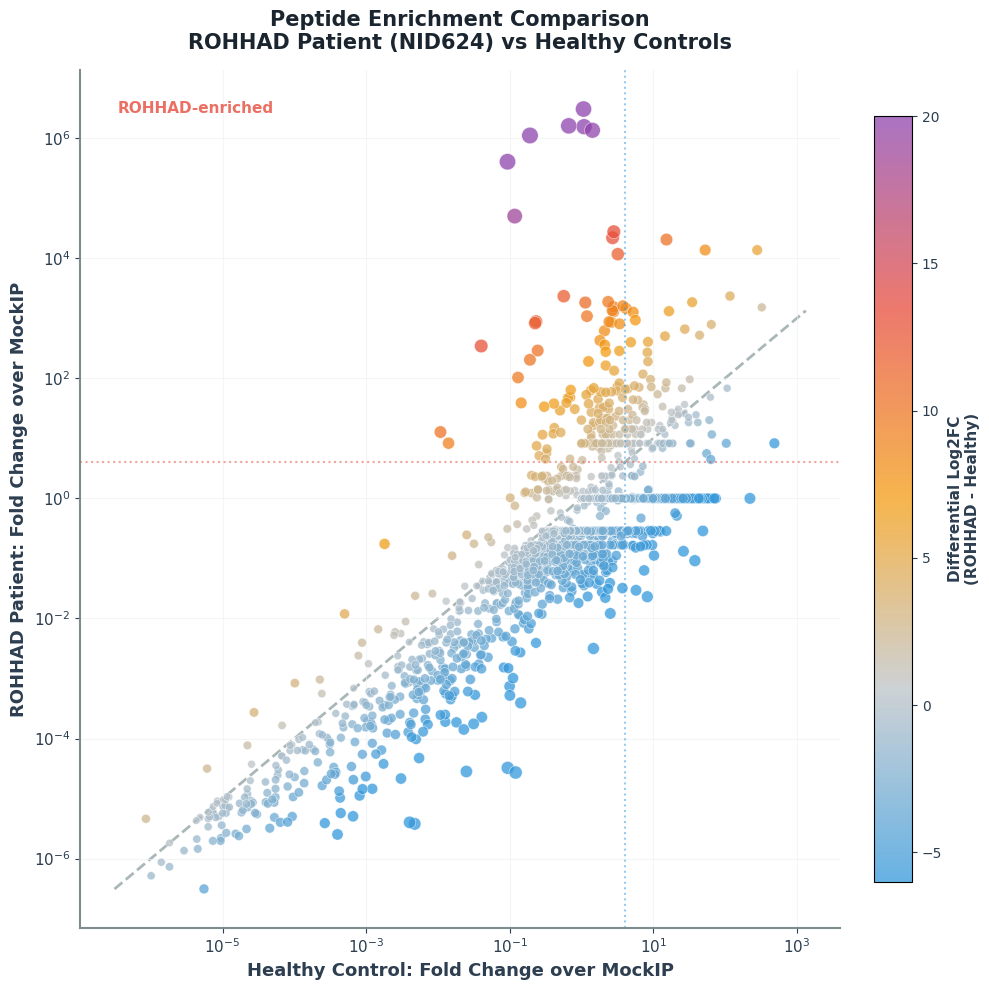


Scatter Plot Summary:
   Total peptides plotted: 3080
   Peptides with >4-fold enrichment in ROHHAD: 248
   Peptides with >4-fold enrichment in Healthy: 528


In [8]:
# ============================================================================
# SCATTER PLOT: Fold Change Comparison (ROHHAD vs Healthy Controls)
# ============================================================================
# This scatter plot compares the linear fold changes over MockIP beads
# between ROHHAD patient and healthy controls, with differential coloring.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'filtered_data' has peptide names as the index
if 'peptide' in filtered_data.columns:
    filtered_data = filtered_data.set_index('peptide')

# Identify the new columns containing log2 fold changes
healthy_log2fc_cols = [col for col in filtered_data.columns if col.endswith('_log2fc_over_mockip') and 'HealthyCtrl' in col]
rohhad_log2fc_cols = [col for col in filtered_data.columns if col.endswith('_log2fc_over_mockip') and 'ROHHAD_NID624' in col]

# For comparison, take the mean log2fc for each peptide across replicates of each group
healthy_log2fc_mean = filtered_data[healthy_log2fc_cols].mean(axis=1)
rohhad_log2fc_mean = filtered_data[rohhad_log2fc_cols].mean(axis=1)

# Convert log2FC to linear fold change for log scaling (pseudo-count to avoid 0)
healthy_linear_fc = np.power(2, healthy_log2fc_mean)
rohhad_linear_fc = np.power(2, rohhad_log2fc_mean)

# Calculate differential enrichment for coloring
diff_enrichment = rohhad_log2fc_mean - healthy_log2fc_mean

# --- Create publication-quality scatter plot ---
fig, ax = plt.subplots(figsize=(10, 10))

# Custom color scheme: emphasize differentially enriched peptides
color_array = np.clip(diff_enrichment, -6, 20)

# Use a professional diverging colormap
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('enrichment', 
    ['#3498DB', '#BDC3C7', '#F39C12', '#E74C3C', '#8E44AD'], N=256)

# Size points by significance (larger for more different)
sizes = 30 + np.clip(np.abs(diff_enrichment) * 5, 0, 150)

scatter = ax.scatter(
    healthy_linear_fc, rohhad_linear_fc,
    c=color_array,
    cmap=cmap,
    alpha=0.75,
    edgecolor='white',
    s=sizes,
    linewidth=0.4
)

ax.set_xscale('log')
ax.set_yscale('log')

# Style labels
ax.set_xlabel('Healthy Control: Fold Change over MockIP', fontsize=13, fontweight='bold', color='#2C3E50')
ax.set_ylabel('ROHHAD Patient: Fold Change over MockIP', fontsize=13, fontweight='bold', color='#2C3E50')
ax.set_title('Peptide Enrichment Comparison\nROHHAD Patient (NID624) vs Healthy Controls',
             fontsize=15, fontweight='bold', color='#1A252F', pad=15)

# Improved tick styling
ax.tick_params(colors='#2C3E50', which='both', labelsize=11)

# Subtle grid
ax.grid(color='#ECF0F1', linestyle='-', linewidth=0.8, alpha=0.6)
ax.set_axisbelow(True)

# Colorbar with better styling
cbar = plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10, colors='#2C3E50')
cbar.set_label('Differential Log2FC\n(ROHHAD - Healthy)', fontsize=11, fontweight='bold', color='#2C3E50')

# Diagonal reference line (y=x: equal enrichment)
lims = [max(ax.get_xlim()[0], ax.get_ylim()[0]), min(ax.get_xlim()[1], ax.get_ylim()[1])]
ax.plot(lims, lims, color='#95A5A6', linestyle='--', linewidth=2, alpha=0.8, zorder=0, label='Equal enrichment')

# Add fold change threshold lines (4x enrichment = log2FC of 2)
fc_threshold = 4  # 4-fold enrichment threshold
ax.axhline(y=fc_threshold, color='#E74C3C', linestyle=':', linewidth=1.5, alpha=0.5)
ax.axvline(x=fc_threshold, color='#3498DB', linestyle=':', linewidth=1.5, alpha=0.5)

# Clean spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color('#7F8C8D')
ax.spines['bottom'].set_color('#7F8C8D')

# Add annotation for enriched region
ax.annotate('ROHHAD-enriched', xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=11, fontweight='bold', color='#E74C3C', alpha=0.8)

plt.tight_layout()

# Save figure
plt.savefig('scatter_fc_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('scatter_fc_comparison.svg', format='svg', bbox_inches='tight')
print("Scatter plot saved as PNG and SVG")

plt.show()

# Summary statistics
print(f"\nScatter Plot Summary:")
print(f"   Total peptides plotted: {len(healthy_linear_fc)}")
print(f"   Peptides with >4-fold enrichment in ROHHAD: {(rohhad_linear_fc > 4).sum()}")
print(f"   Peptides with >4-fold enrichment in Healthy: {(healthy_linear_fc > 4).sum()}")


In [9]:
rohhad_linear_fc


peptide
gi|310923116|ref|NP_001185608.1|_protein_CBFA2T1_isoform_F_[Homo_sapiens]_fragment_12                                          1.678170e-01
gi|578803866|ref|XP_006712407.1|_PREDICTED:_coiled-coil_domain-containing_protein_138_isoform_X2_[Homo_sapiens]_fragment_11    1.000000e+00
gi|115648063|ref|NP_001070253.1|_Y+L_amino_acid_transporter_2_[Homo_sapiens]_fragment_1                                        1.000000e+00
gi|574271031|ref|NP_001276019.1|_zinc_finger_MYM-type_protein_1_isoform_a_[Homo_sapiens]_fragment_16                           1.000000e+00
gi|767882649|ref|XP_011535139.1|_PREDICTED:_mucin-5AC-like_[Homo_sapiens]_fragment_8                                           1.000000e+00
                                                                                                                                   ...     
gi|807201167|ref|NP_001293108.1|_hepatocyte_nuclear_factor_1-alpha_isoform_1_[Homo_sapiens]_fragment_7                         1.605343e+06
gi|613410203

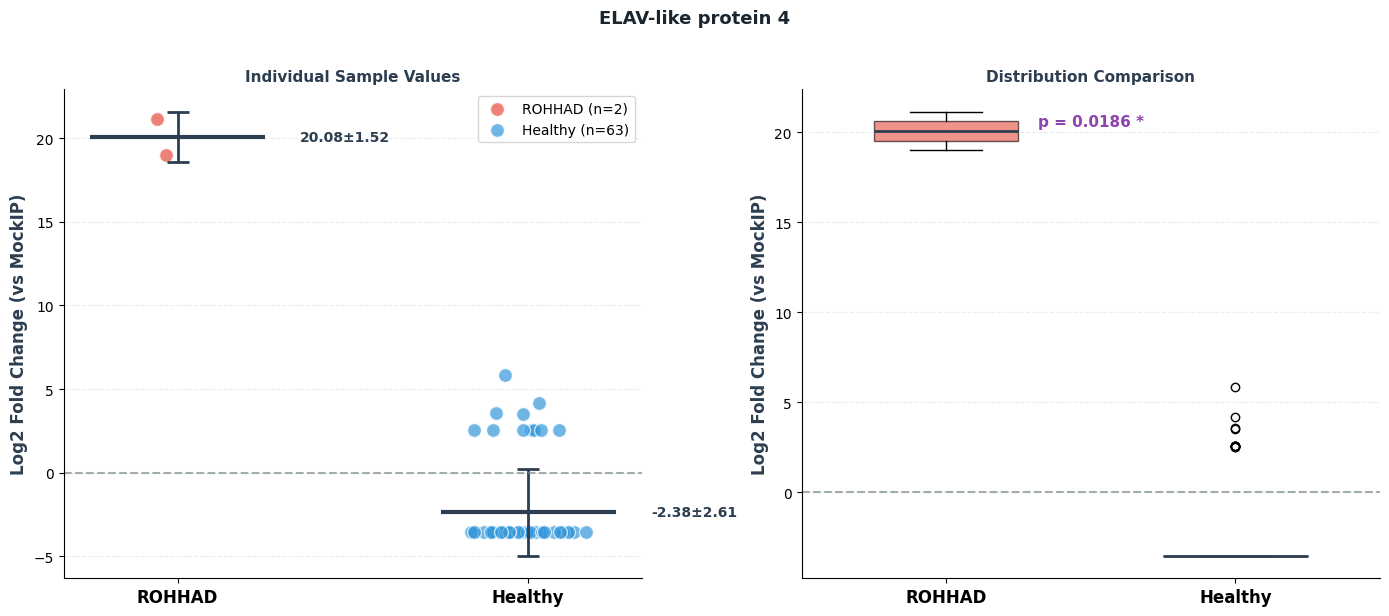

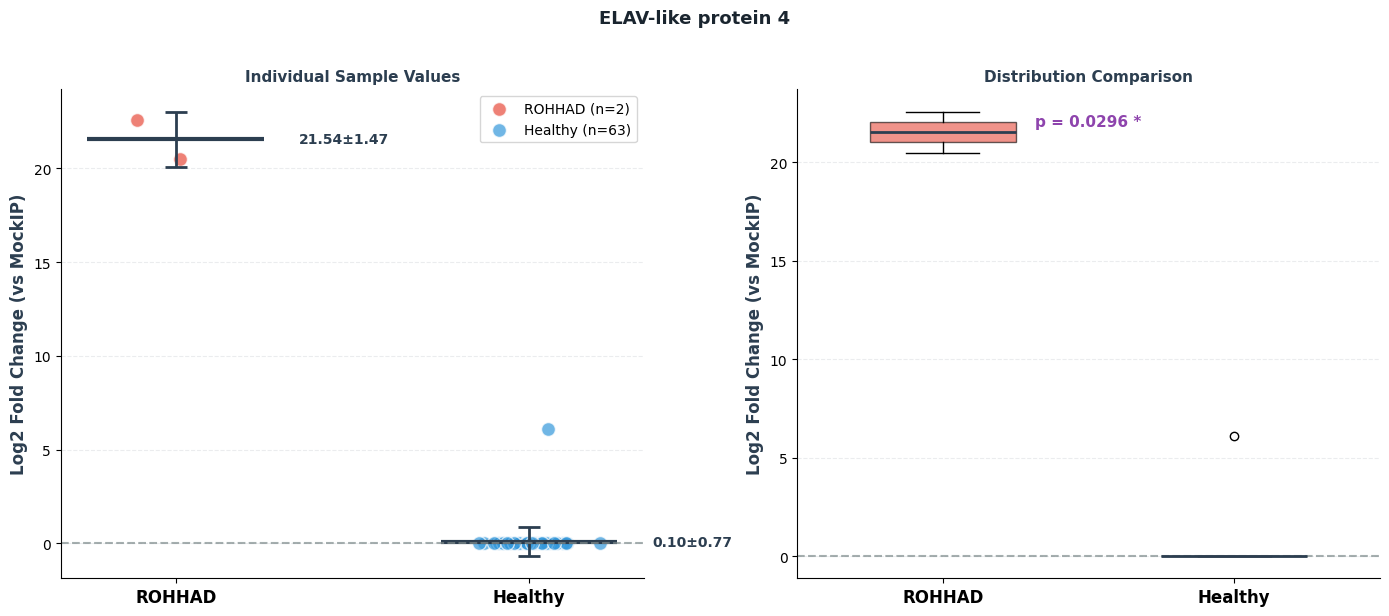

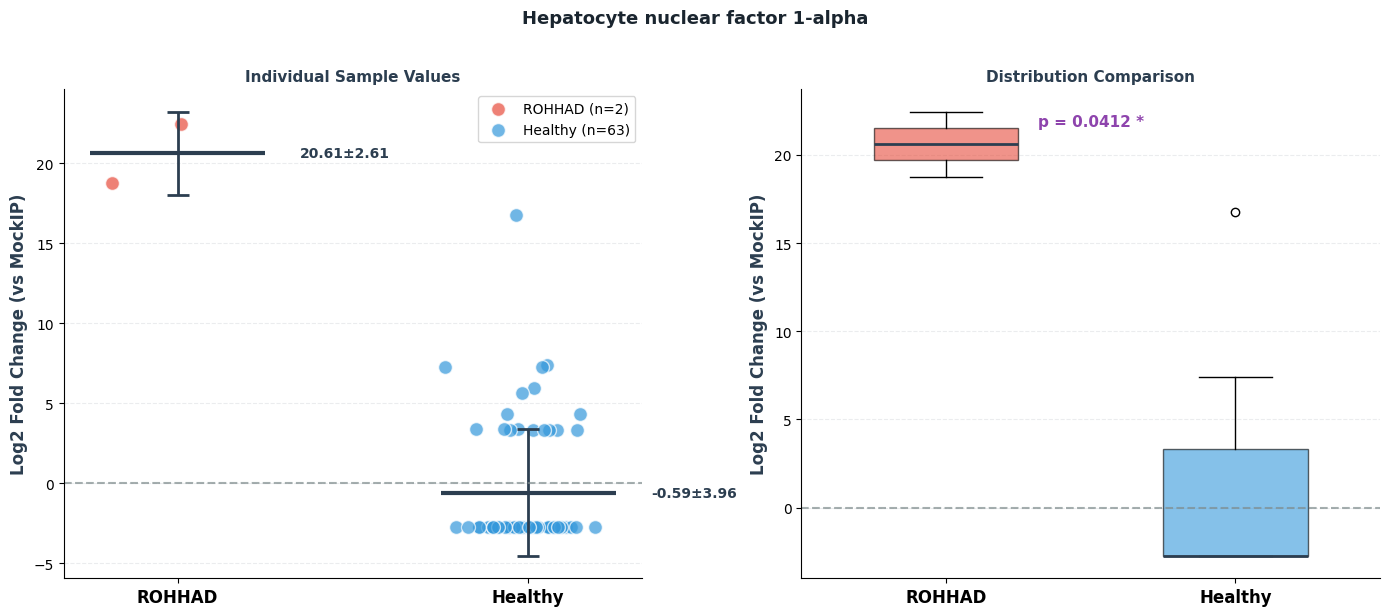

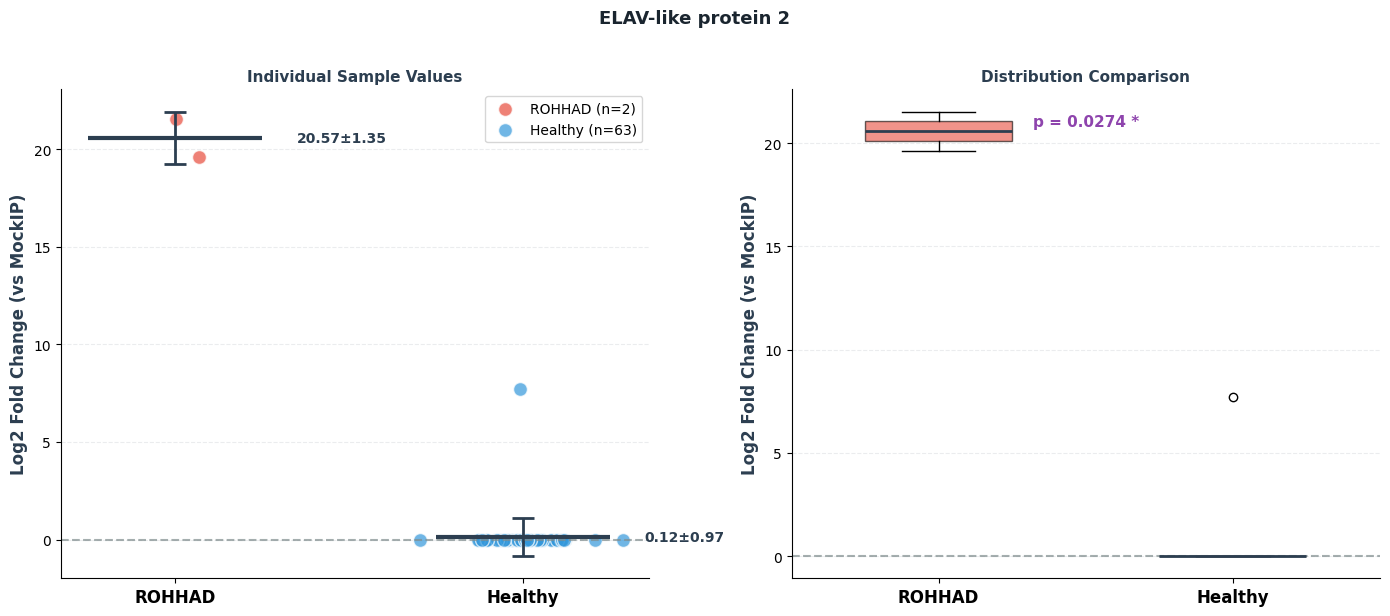

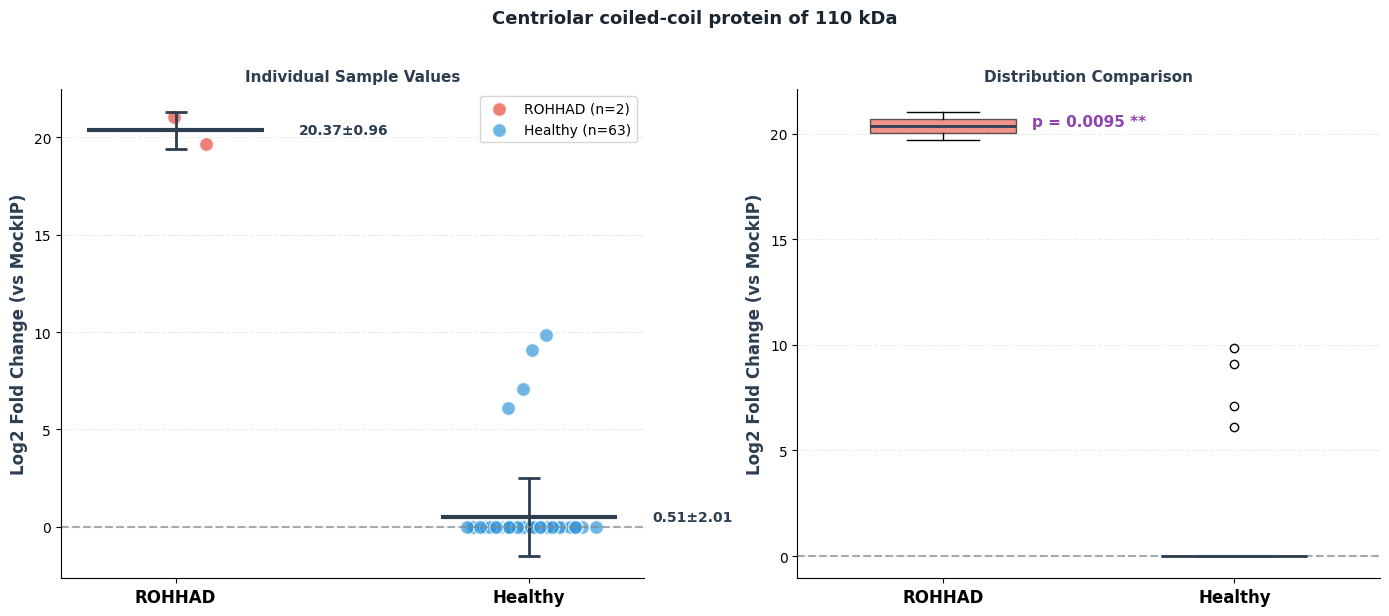

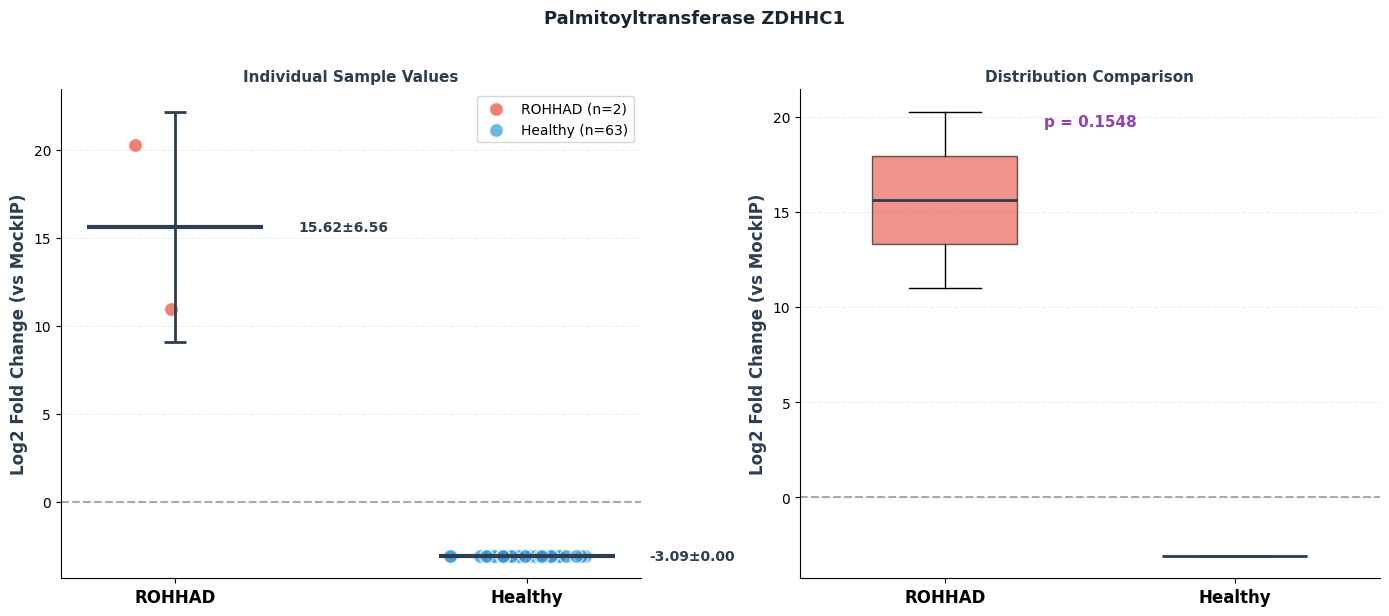

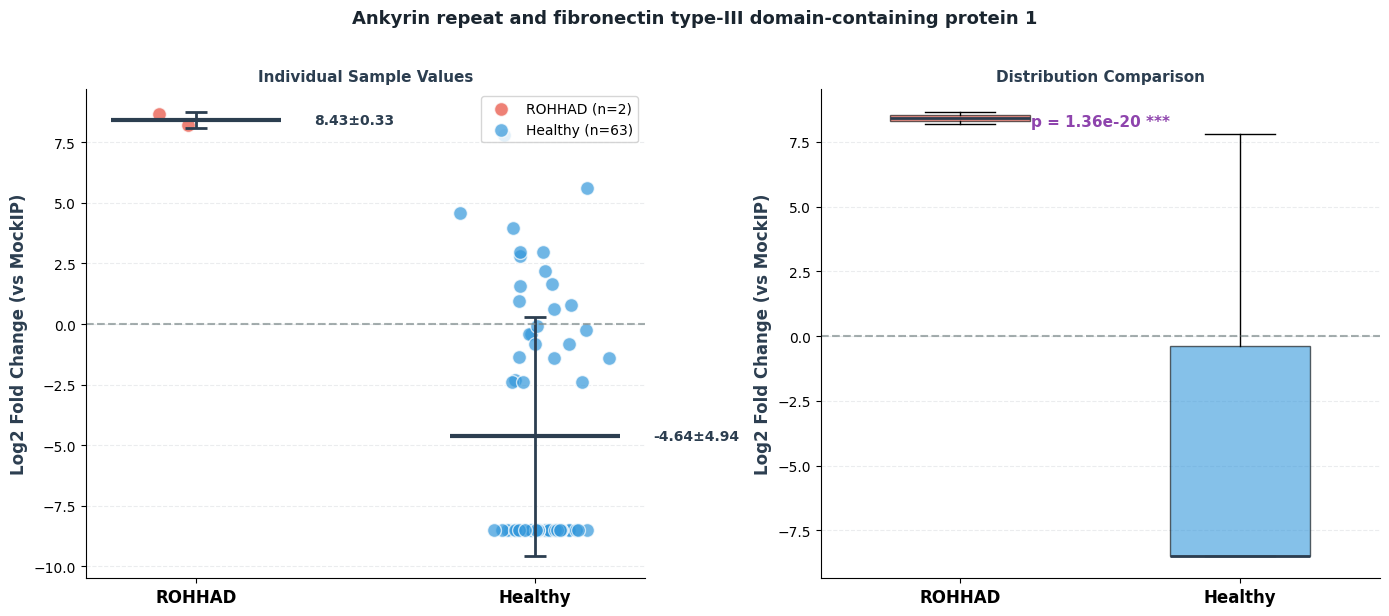

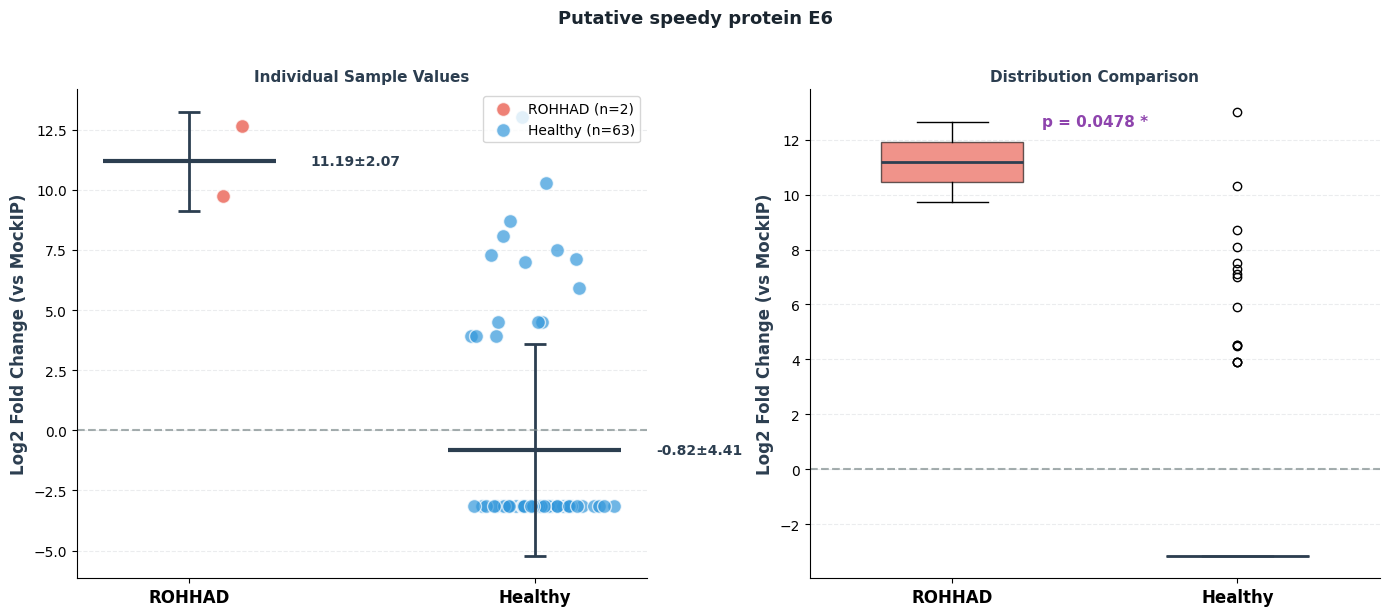

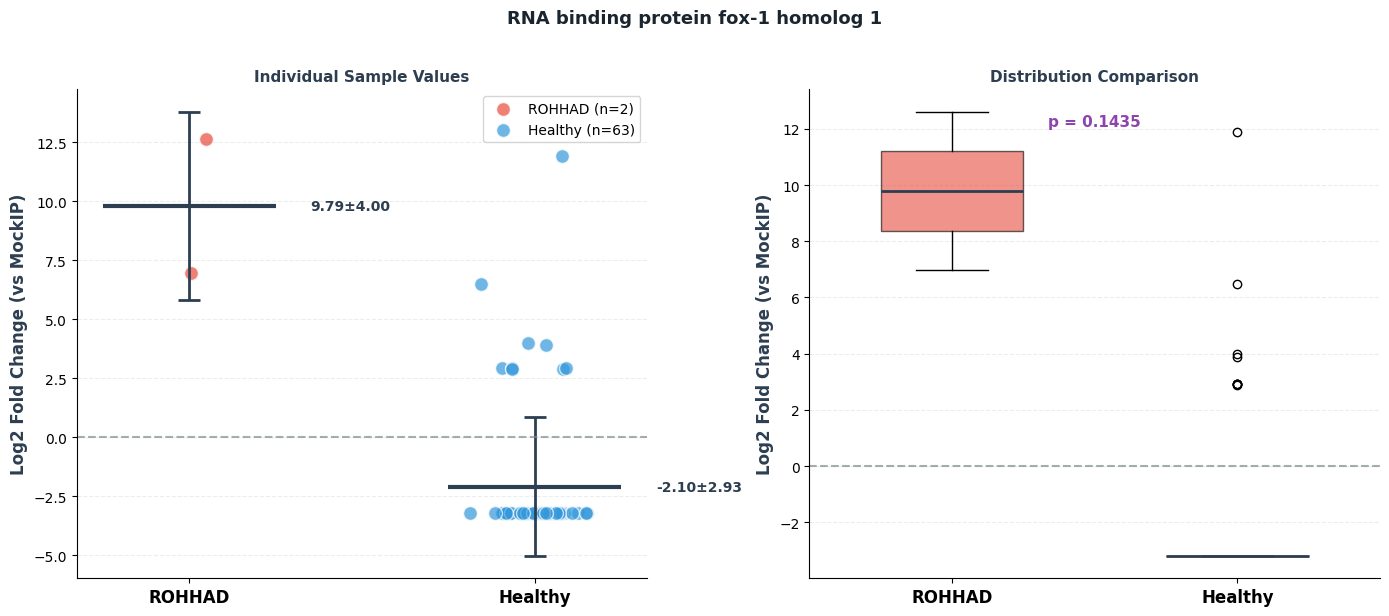

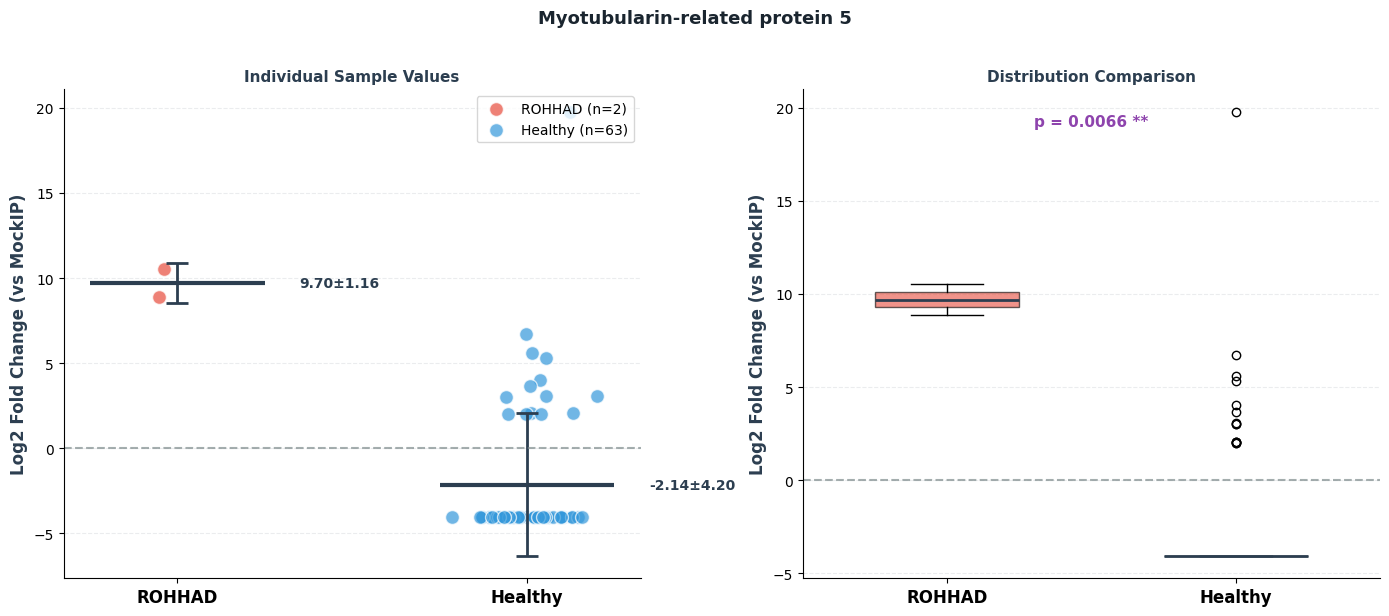

In [10]:
import importlib
import phip_seq_helper_functions
importlib.reload(phip_seq_helper_functions)
from phip_seq_helper_functions import plot_per_peptide_comparison

# Select column names:
diseased_columns = [col for col in filtered_data.columns if "ROHHAD_NID624" in col and col.endswith("_log2fc_over_mockip")]
healthy_columns = [col for col in filtered_data.columns if "healthyctrl" in col.lower() and col.endswith("_log2fc_over_mockip")]

# Peptides where mean healthy < 1 and mean disease > 1 (log2fc)
peptide_data = []
# Use set to only allow unique short protein identifiers (e.g., by removing isoform/fragment label)
seen_base_names = set()
def peptide_base_name(peptide):
    # Extracts the part up to the first space or to the first |fragment_ label
    if "fragment" in peptide:
        return peptide.split("fragment")[0].strip()
    else:
        return peptide.split()[0].strip()

for peptide in filtered_data.index:
    base_name = peptide_base_name(peptide)
    if base_name in seen_base_names:
        continue  # skip replicates
    healthy_vals = filtered_data.loc[peptide, healthy_columns]
    diseased_vals = filtered_data.loc[peptide, diseased_columns]
    if (
        len(healthy_vals) > 0 and len(diseased_vals) > 0 and
        healthy_vals.mean() < 1 and
        diseased_vals.mean() > 1
    ):
        diff = diseased_vals.mean() - healthy_vals.mean()
        peptide_data.append((peptide, diff))
        seen_base_names.add(base_name)

# Only use top 10 hits (by difference: disease mean - healthy mean; descending)
top_peptides = [peptide for peptide, diff in sorted(peptide_data, key=lambda x: x[1], reverse=True)[:10]]

# Plot individual peptide comparisons
for peptide in top_peptides:
    plot_per_peptide_comparison(filtered_data, peptide, diseased_columns, healthy_columns, 
                                 clean_label=peptide_to_clean_label[peptide])

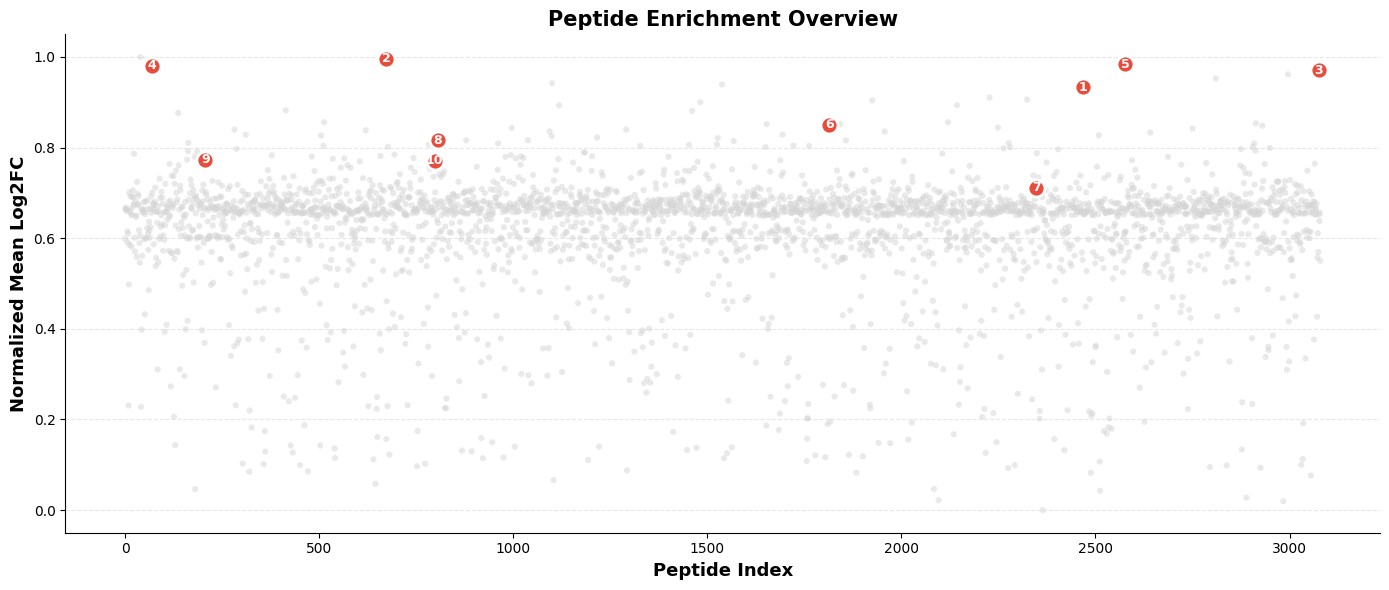


Top 10 Enriched Peptides:
--------------------------------------------------
   1. ELAV-like protein 4
   2. ELAV-like protein 4
   3. Hepatocyte nuclear factor 1-alpha
   4. ELAV-like protein 2
   5. Centriolar coiled-coil protein of 110 kDa
   6. Palmitoyltransferase ZDHHC1
   7. Ankyrin repeat and fibronectin type-III domain-containing protein 1
   8. Putative speedy protein E6
   9. RNA binding protein fox-1 homolog 1
  10. Myotubularin-related protein 5


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Compute mean log2FC across both groups for each peptide
average_means = []
for peptide in filtered_data.index:
    healthy_vals = filtered_data.loc[peptide, healthy_columns]
    diseased_vals = filtered_data.loc[peptide, diseased_columns]
    avg_mean = (healthy_vals.mean() + diseased_vals.mean()) / 2
    average_means.append(avg_mean)

average_means = np.array(average_means)
min_val, max_val = np.min(average_means), np.max(average_means)
normalized_means = (average_means - min_val) / (max_val - min_val) if max_val > min_val else np.zeros_like(average_means)

peptide_index_map = {pep: i for i, pep in enumerate(filtered_data.index)}

fig, ax = plt.subplots(figsize=(14, 6))

# Background scatter
ax.scatter(range(len(normalized_means)), normalized_means, 
           color='#D5D5D5', alpha=0.5, s=20, edgecolors='none')

# Highlight top peptides with numbered markers
for rank, peptide in enumerate(top_peptides, 1):
    idx = peptide_index_map[peptide]
    ax.scatter(idx, normalized_means[idx], color='#E74C3C', s=150, 
               edgecolor='white', linewidth=2, zorder=5)
    ax.annotate(str(rank), (idx, normalized_means[idx]), 
                fontsize=9, fontweight='bold', color='white',
                ha='center', va='center', zorder=6)

ax.set_xlabel("Peptide Index", fontsize=13, fontweight='bold')
ax.set_ylabel("Normalized Mean Log2FC", fontsize=13, fontweight='bold')
ax.set_title("Peptide Enrichment Overview", fontsize=15, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Print numbered legend
print("\nTop 10 Enriched Peptides:")
print("-" * 50)
for rank, peptide in enumerate(top_peptides, 1):
    print(f"  {rank:2d}. {peptide_to_clean_label[peptide]}")


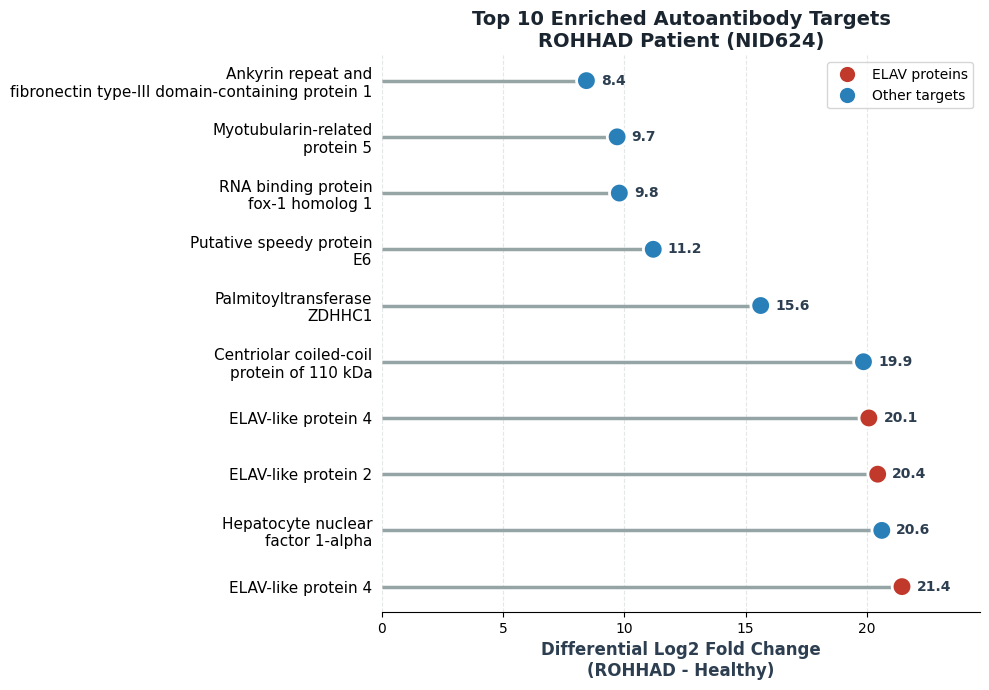


Top 10 Enriched Targets (sorted by enrichment):
   1. ELAV-like protein 4: 21.45 [ELAV]
   2. Hepatocyte nuclear factor 1-alpha: 20.61
   3. ELAV-like protein 2: 20.45 [ELAV]
   4. ELAV-like protein 4: 20.08 [ELAV]
   5. Centriolar coiled-coil protein of 110 kDa: 19.86
   6. Palmitoyltransferase ZDHHC1: 15.62
   7. Putative speedy protein E6: 11.19
   8. RNA binding protein fox-1 homolog 1: 9.79
   9. Myotubularin-related protein 5: 9.70
  10. Ankyrin repeat and fibronectin type-III domain-containing protein 1: 8.43


In [12]:
# ============================================================================
# LOLLIPOP PLOT: Top 10 Enriched Autoantibody Targets (with line breaks in y labels)
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_mean_log2fc(df, columns, peptides):
    """Calculate mean log2FC for peptides across given columns."""
    result = {}
    for pep in peptides:
        if pep in df.index:
            vals = df.loc[pep, columns].values.astype(float)
            result[pep] = max(np.nanmean(vals), 0)
        else:
            result[pep] = 0.0
    return pd.Series(result)

healthy_mean = get_mean_log2fc(filtered_data, healthy_columns, top_peptides)
rohhad_mean = get_mean_log2fc(filtered_data, diseased_columns, top_peptides)
diff_enrichment = (rohhad_mean - healthy_mean).clip(lower=0)

# Get clean labels
def break_label(label, maxlen=24):
    """Insert line split into labels at the closest space before maxlen characters."""
    if len(label) <= maxlen:
        return label
    # Try breaking at a space before maxlen, else at maxlen
    break_idx = label[:maxlen].rfind(' ')
    if break_idx == -1:
        break_idx = maxlen
    return label[:break_idx].rstrip() + '\n' + label[break_idx:].lstrip()

labels = [peptide_to_clean_label[p] for p in top_peptides]
labels_broken = [break_label(lbl) for lbl in labels]

# Sort by enrichment for better visual
sorted_idx = np.argsort(diff_enrichment.values)[::-1]
labels_sorted = [labels_broken[i] for i in sorted_idx]
values_sorted = diff_enrichment.values[sorted_idx]

fig, ax = plt.subplots(figsize=(10, 7))

y_pos = np.arange(len(labels_sorted))

# Color coding: ELAV proteins highlighted
colors = ['#C0392B' if 'elav' in l.lower() else '#2980B9' for l in labels_sorted]

# Horizontal lollipop
ax.hlines(y_pos, 0, values_sorted, color='#95A5A6', linewidth=2.5, zorder=1)
ax.scatter(values_sorted, y_pos, s=200, c=colors, edgecolors='white', linewidth=2, zorder=2)

# Value labels on dots
for i, (v, label) in enumerate(zip(values_sorted, labels_sorted)):
    ax.text(v + 0.6, i, f'{v:.1f}', va='center', ha='left', fontsize=10, fontweight='bold', color='#2C3E50')

ax.set_yticks(y_pos)
ax.set_yticklabels(labels_sorted, fontsize=11, linespacing=1.2)
ax.set_xlabel('Differential Log2 Fold Change\n(ROHHAD - Healthy)', fontsize=12, fontweight='bold', color='#2C3E50')
ax.set_title('Top 10 Enriched Autoantibody Targets\nROHHAD Patient (NID624)', fontsize=14, fontweight='bold', color='#1A252F')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False)
ax.xaxis.grid(True, linestyle='--', alpha=0.4, color='#BDC3C7')
ax.set_axisbelow(True)
ax.set_xlim(0, max(values_sorted) * 1.15)

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#C0392B', markersize=12, label='ELAV proteins'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#2980B9', markersize=12, label='Other targets')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fontsize=10)

plt.tight_layout()
plt.savefig("top10_lollipop.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\nTop 10 Enriched Targets (sorted by enrichment):")
for i, (l, v) in enumerate(zip([labels[i] for i in sorted_idx], values_sorted), 1):
    marker = " [ELAV]" if 'elav' in l.lower() else ""
    print(f"  {i:2d}. {l}: {v:.2f}{marker}")

In [13]:
# ============================================================================
# STATISTICAL VALIDATION: T-tests with FDR (Benjamini-Hochberg) correction
# ============================================================================
# This cell performs rigorous statistical testing to validate differential
# enrichment of autoantibody targets between ROHHAD and Healthy controls.


import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import mannwhitneyu, ttest_ind

def calculate_differential_stats(df, rohhad_cols, healthy_cols, min_samples=2):
    """
    Calculate differential enrichment statistics for each peptide.
    
    Returns DataFrame with:
    - mean_rohhad: Mean log2FC in ROHHAD samples
    - mean_healthy: Mean log2FC in Healthy samples
    - diff: Difference (ROHHAD - Healthy)
    - pvalue: Two-sided Welch's t-test p-value
    - pvalue_mw: Mann-Whitney U test p-value (non-parametric alternative)
    """
    results = []
    
    for peptide in df.index:
        rohhad_vals = df.loc[peptide, rohhad_cols].values.astype(float)
        healthy_vals = df.loc[peptide, healthy_cols].values.astype(float)
        
        # Remove NaN values
        rohhad_vals = rohhad_vals[~np.isnan(rohhad_vals)]
        healthy_vals = healthy_vals[~np.isnan(healthy_vals)]
        
        if len(rohhad_vals) >= min_samples and len(healthy_vals) >= min_samples:
            mean_rohhad = np.mean(rohhad_vals)
            mean_healthy = np.mean(healthy_vals)
            std_rohhad = np.std(rohhad_vals, ddof=1)
            std_healthy = np.std(healthy_vals, ddof=1)
            
            # Welch's t-test (unequal variances)
            _, pvalue = ttest_ind(rohhad_vals, healthy_vals, equal_var=False)
            
            # Mann-Whitney U test (non-parametric)
            _, pvalue_mw = mannwhitneyu(rohhad_vals, healthy_vals, alternative='two-sided')
            
            results.append({
                'peptide': peptide,
                'mean_rohhad': mean_rohhad,
                'mean_healthy': mean_healthy,
                'std_rohhad': std_rohhad,
                'std_healthy': std_healthy,
                'diff': mean_rohhad - mean_healthy,
                'n_rohhad': len(rohhad_vals),
                'n_healthy': len(healthy_vals),
                'pvalue_ttest': pvalue,
                'pvalue_mw': pvalue_mw
            })
    
    return pd.DataFrame(results)

def benjamini_hochberg_correction(pvalues, alpha=0.05):
    """
    Apply Benjamini-Hochberg FDR correction.
    Returns adjusted p-values (q-values).
    """
    n = len(pvalues)
    sorted_idx = np.argsort(pvalues)
    sorted_pvals = np.array(pvalues)[sorted_idx]
    
    # Calculate BH critical values
    qvalues = np.zeros(n)
    for i, (idx, pval) in enumerate(zip(sorted_idx, sorted_pvals)):
        rank = i + 1
        qvalues[idx] = pval * n / rank
    
    # Ensure monotonicity (cumulative minimum from the end)
    for i in range(n - 2, -1, -1):
        if qvalues[sorted_idx[i]] > qvalues[sorted_idx[i + 1]]:
            qvalues[sorted_idx[i]] = qvalues[sorted_idx[i + 1]]
    
    return np.clip(qvalues, 0, 1)

# Get column groups
rohhad_log2fc_cols = [col for col in filtered_data.columns 
                      if "ROHHAD_NID624" in col and col.endswith("_log2fc_over_mockip")]
healthy_log2fc_cols = [col for col in filtered_data.columns 
                       if "HealthyCtrl" in col and col.endswith("_log2fc_over_mockip")]

print(f"Statistical Analysis Setup:")
print(f"   ROHHAD samples: {len(rohhad_log2fc_cols)}")
print(f"   Healthy samples: {len(healthy_log2fc_cols)}")
print(f"   Total peptides: {len(filtered_data)}")

# Calculate statistics
stats_df = calculate_differential_stats(filtered_data, rohhad_log2fc_cols, healthy_log2fc_cols)

# Apply FDR correction
stats_df['qvalue_ttest'] = benjamini_hochberg_correction(stats_df['pvalue_ttest'].values)
stats_df['qvalue_mw'] = benjamini_hochberg_correction(stats_df['pvalue_mw'].values)

# Add significance flags
stats_df['significant_fdr05'] = stats_df['qvalue_ttest'] < 0.05
stats_df['significant_fdr01'] = stats_df['qvalue_ttest'] < 0.01

# Sort by differential enrichment
stats_df = stats_df.sort_values('diff', ascending=False).reset_index(drop=True)

print(f"\nStatistical Testing Complete:")
print(f"   Peptides with FDR < 0.05: {stats_df['significant_fdr05'].sum()}")
print(f"   Peptides with FDR < 0.01: {stats_df['significant_fdr01'].sum()}")

# Show top 15 most enriched peptides with statistics
print("\nTop 15 Enriched Peptides in ROHHAD (with statistical validation):")
print("="*100)

top15 = stats_df.head(15)
for i, row in top15.iterrows():
    short_name = row['peptide'].split('|')[-1][:45] if '|' in row['peptide'] else row['peptide'][:45]
    sig_marker = "***" if row['qvalue_ttest'] < 0.001 else "**" if row['qvalue_ttest'] < 0.01 else "*" if row['qvalue_ttest'] < 0.05 else ""
    print(f"{i+1:2d}. {short_name}...")
    print(f"    Diff: {row['diff']:+.2f} | ROHHAD: {row['mean_rohhad']:.2f}±{row['std_rohhad']:.2f} | "
          f"Healthy: {row['mean_healthy']:.2f}±{row['std_healthy']:.2f}")
    print(f"    p-value: {row['pvalue_ttest']:.2e} | FDR q-value: {row['qvalue_ttest']:.2e} {sig_marker}")
    print()

# Save stats to CSV for reference
stats_df.to_csv('statistical_analysis_results.csv', index=False)
print(f"\nFull results saved to: statistical_analysis_results.csv")


Statistical Analysis Setup:
   ROHHAD samples: 2
   Healthy samples: 63
   Total peptides: 3080

Statistical Testing Complete:
   Peptides with FDR < 0.05: 2056
   Peptides with FDR < 0.01: 1530

Top 15 Enriched Peptides in ROHHAD (with statistical validation):
 1. _PREDICTED:_ELAV-like_protein_4_isoform_X1_[H...
    Diff: +22.46 | ROHHAD: 20.08±1.52 | Healthy: -2.38±2.61
    p-value: 1.86e-02 | FDR q-value: 3.00e-02 *

 2. _PREDICTED:_ELAV-like_protein_2_isoform_X7_[H...
    Diff: +22.05 | ROHHAD: 18.63±3.10 | Healthy: -3.42±2.99
    p-value: 5.66e-02 | FDR q-value: 7.92e-02 

 3. _ELAV-like_protein_4_isoform_3_[Homo_sapiens]...
    Diff: +21.45 | ROHHAD: 21.54±1.47 | Healthy: 0.10±0.77
    p-value: 2.96e-02 | FDR q-value: 4.46e-02 *

 4. _hepatocyte_nuclear_factor_1-alpha_isoform_1_...
    Diff: +21.20 | ROHHAD: 20.61±2.61 | Healthy: -0.59±3.96
    p-value: 4.12e-02 | FDR q-value: 6.09e-02 

 5. _PREDICTED:_ELAV-like_protein_2_isoform_X7_[H...
    Diff: +20.45 | ROHHAD: 20.57±1.35 | 

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


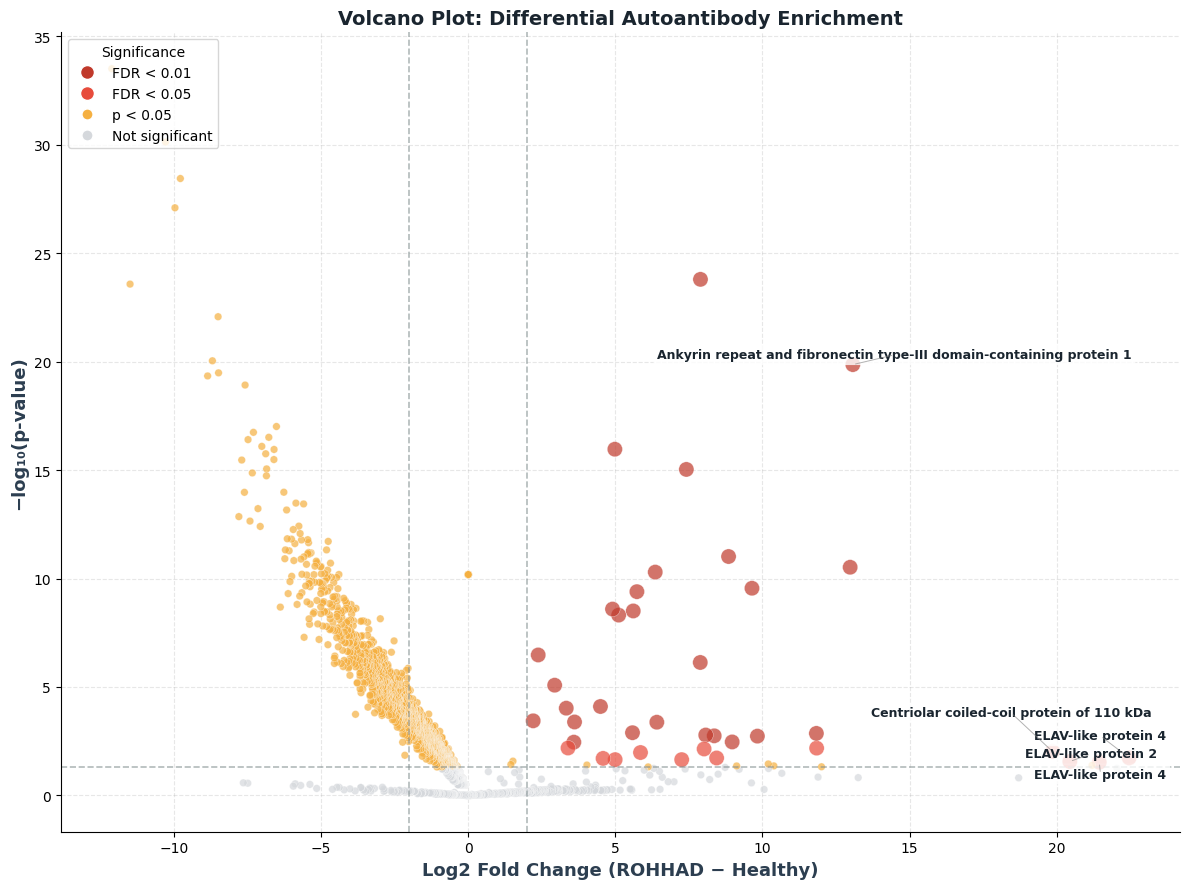


Volcano Summary:
  Enriched in ROHHAD (FDR<0.05, FC>4x): 39
  Depleted in ROHHAD (FDR<0.05, FC<0.25x): 905


In [26]:
# ============================================================================
# VOLCANO PLOT: Differential Enrichment with Statistical Significance
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
    
volcano_data = stats_df.copy()
volcano_data['-log10_pval'] = -np.log10(volcano_data['pvalue_ttest'].clip(lower=1e-300))
volcano_data['label'] = volcano_data['peptide'].map(peptide_to_clean_label)

fc_thresh = 2.0  # log2FC threshold

# Assign colors based on significance
def get_color(row):
    if row['qvalue_ttest'] < 0.01 and row['diff'] >= fc_thresh:
        return '#C0392B'  # Dark red - highly significant enriched
    elif row['qvalue_ttest'] < 0.05 and row['diff'] >= fc_thresh:
        return '#E74C3C'  # Red - significant enriched
    elif row['pvalue_ttest'] < 0.05:
        return '#F5B041'  # Orange - nominal
    else:
        return '#D5D8DC'  # Gray - not significant

volcano_data['color'] = volcano_data.apply(get_color, axis=1)
volcano_data['size'] = volcano_data.apply(
    lambda r: 120 if r['qvalue_ttest'] < 0.05 and r['diff'] >= fc_thresh else 30, axis=1)

fig, ax = plt.subplots(figsize=(12, 9))

# Plot all points
ax.scatter(volcano_data['diff'], volcano_data['-log10_pval'],
           c=volcano_data['color'], s=volcano_data['size'],
           alpha=0.7, edgecolors='white', linewidth=0.3)

# Threshold lines
ax.axhline(-np.log10(0.05), color='#7F8C8D', ls='--', lw=1.2, alpha=0.6)
ax.axvline(fc_thresh, color='#7F8C8D', ls='--', lw=1.2, alpha=0.6)
ax.axvline(-fc_thresh, color='#7F8C8D', ls='--', lw=1.2, alpha=0.6)

# Label only top 5 enriched (no messy overlap), adjusted with adjustText
top5 = volcano_data[(volcano_data['qvalue_ttest'] < 0.05) & (volcano_data['diff'] > fc_thresh)].nlargest(5, 'diff')
texts = []
for _, row in top5.iterrows():
    txt = ax.text(
        row['diff'], row['-log10_pval'],
        row['label'],
        fontsize=9, fontweight='bold', color='#1A252F',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='none')
    )
    texts.append(txt)

adjust_text(
        texts,
        only_move={'points': 'y', 'text': 'y'},  # allow vertical move only
        autoalign='y',
        force_points=0.2,
        force_text=0.2,
        expand_text=(1.1, 1.3),
        ax=ax,
        arrowprops=dict(arrowstyle='-', color='gray', lw=0.7, alpha=0.6),
        )

ax.set_xlabel('Log2 Fold Change (ROHHAD − Healthy)', fontsize=13, fontweight='bold', color='#2C3E50')
ax.set_ylabel('−log₁₀(p-value)', fontsize=13, fontweight='bold', color='#2C3E50')
ax.set_title('Volcano Plot: Differential Autoantibody Enrichment', fontsize=14, fontweight='bold', color='#1A252F')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, ls='--', alpha=0.3)
ax.xaxis.grid(True, ls='--', alpha=0.3)
ax.set_axisbelow(True)

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#C0392B', markersize=10, label='FDR < 0.01'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#E74C3C', markersize=10, label='FDR < 0.05'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#F5B041', markersize=8, label='p < 0.05'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#D5D8DC', markersize=8, label='Not significant'),
]
ax.legend(handles=legend_elements, loc='upper left', frameon=True, fontsize=10, title='Significance')

plt.tight_layout()
plt.savefig('volcano_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Summary
sig_up = len(volcano_data[(volcano_data['qvalue_ttest'] < 0.05) & (volcano_data['diff'] > fc_thresh)])
sig_down = len(volcano_data[(volcano_data['qvalue_ttest'] < 0.05) & (volcano_data['diff'] < -fc_thresh)])
print(f"\nVolcano Summary:")
print(f"  Enriched in ROHHAD (FDR<0.05, FC>4x): {sig_up}")
print(f"  Depleted in ROHHAD (FDR<0.05, FC<0.25x): {sig_down}")


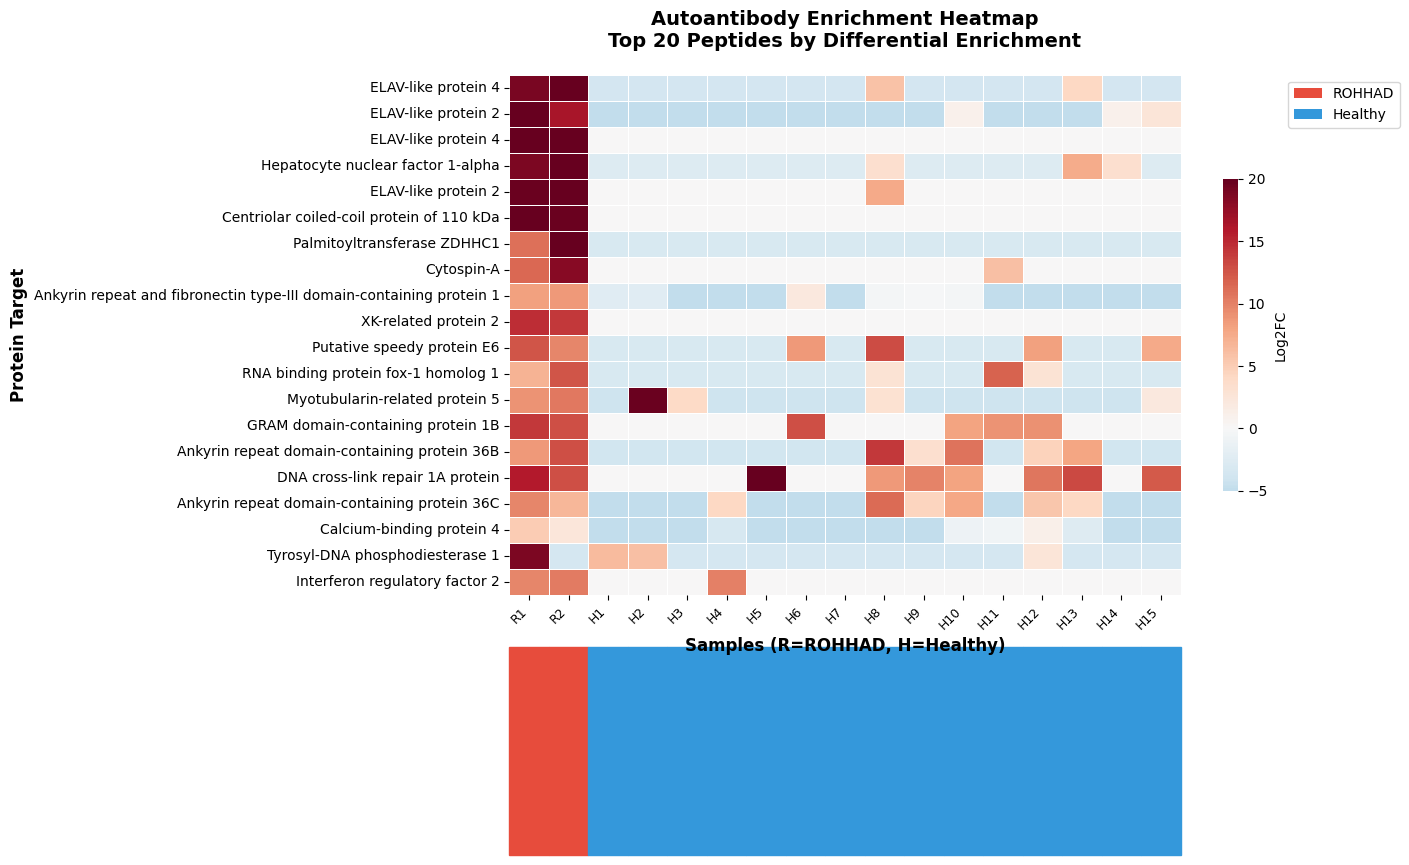


Heatmap shows 20 peptides across 2 ROHHAD + 15 healthy samples
ELAV proteins in heatmap: 4


In [27]:
# ============================================================================
# HEATMAP: Top Enriched Peptides Across Samples
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get top 20 peptides by enrichment
top_heatmap = stats_df.nlargest(20, 'diff')['peptide'].tolist()

# Get columns
rohhad_cols = [c for c in filtered_data.columns if "ROHHAD_NID624" in c and c.endswith("_log2fc_over_mockip")]
healthy_cols = [c for c in filtered_data.columns if "HealthyCtrl" in c and c.endswith("_log2fc_over_mockip")]

# Prepare data - ROHHAD first, then subset of healthy (too many to show all)
healthy_subset = healthy_cols[:15]  # Show 15 healthy samples
all_cols = rohhad_cols + healthy_subset

hm_data = filtered_data.loc[top_heatmap, all_cols].copy().astype(float)
hm_data.index = [peptide_to_clean_label[p] for p in hm_data.index]

# Simplify column names
col_labels = []
for i, c in enumerate(all_cols):
    if 'ROHHAD' in c:
        col_labels.append(f'R{i+1}')
    else:
        col_labels.append(f'H{i+1-len(rohhad_cols)}')
hm_data.columns = col_labels

# Column colors
col_colors = ['#E74C3C'] * len(rohhad_cols) + ['#3498DB'] * len(healthy_subset)

fig, ax = plt.subplots(figsize=(14, 10))

# Simple heatmap (no clustering for cleaner look)
sns.heatmap(hm_data, cmap='RdBu_r', center=0, vmin=-5, vmax=20,
            ax=ax, linewidths=0.5, linecolor='white',
            cbar_kws={'label': 'Log2FC', 'shrink': 0.6})

# Add column color bar at top
for i, color in enumerate(col_colors):
    ax.add_patch(plt.Rectangle((i, -0.5), 1, 0.4, color=color, clip_on=False, transform=ax.get_xaxis_transform()))

ax.set_xlabel('Samples (R=ROHHAD, H=Healthy)', fontsize=12, fontweight='bold')
ax.set_ylabel('Protein Target', fontsize=12, fontweight='bold')
ax.set_title('Autoantibody Enrichment Heatmap\nTop 20 Peptides by Differential Enrichment', 
             fontsize=14, fontweight='bold', pad=20)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.setp(ax.get_yticklabels(), fontsize=10)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#E74C3C', label='ROHHAD'),
    Patch(facecolor='#3498DB', label='Healthy')
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.15, 1), frameon=True)

plt.tight_layout()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Summary
elav_count = sum(1 for p in hm_data.index if 'elav' in p.lower())
print(f"\nHeatmap shows {len(hm_data)} peptides across {len(rohhad_cols)} ROHHAD + {len(healthy_subset)} healthy samples")
print(f"ELAV proteins in heatmap: {elav_count}")


Effect Size Analysis Summary:
   Total peptides analyzed: 3080
   Very large effects (|d| > 1.2): 121
   Large effects (0.8 < |d| ≤ 1.2): 216
   Medium effects (0.5 < |d| ≤ 0.8): 762


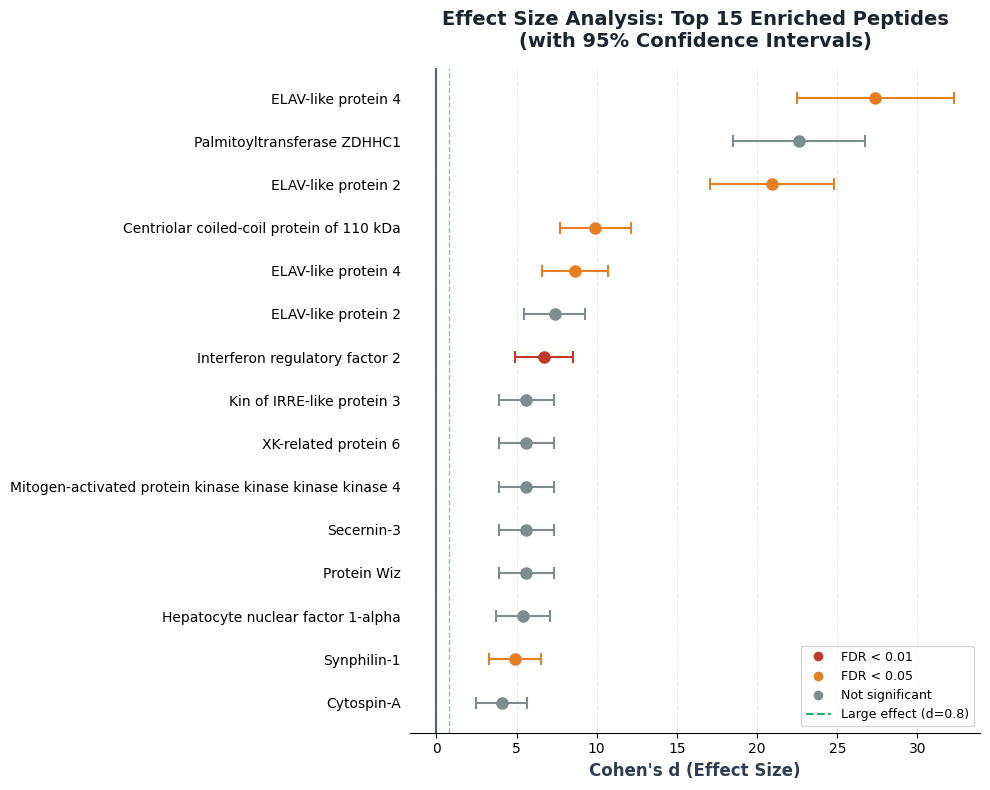


Top 10 by Effect Size:
------------------------------------------------------------
 1. ELAV-like protein 4
    d = 27.37 [22.46, 32.29] | very large
 2. Palmitoyltransferase ZDHHC1
    d = 22.62 [18.49, 26.76] | very large
 3. ELAV-like protein 2
    d = 20.95 [17.08, 24.81] | very large
 4. Centriolar coiled-coil protein of 110 kD
    d = 9.92 [7.71, 12.13] | very large
 5. ELAV-like protein 4
    d = 8.65 [6.60, 10.70] | very large
 6. ELAV-like protein 2
    d = 7.37 [5.48, 9.27] | very large
 7. Interferon regulatory factor 2
    d = 6.69 [4.87, 8.51] | very large
 8. Kin of IRRE-like protein 3
    d = 5.61 [3.91, 7.32] | very large
 9. XK-related protein 6
    d = 5.61 [3.91, 7.32] | very large
10. Mitogen-activated protein kinase kinase 
    d = 5.61 [3.91, 7.32] | very large


In [28]:
# ============================================================================
# EFFECT SIZE ANALYSIS: Cohen's d with Confidence Intervals
# ============================================================================
# Effect size provides a standardized measure of the magnitude of difference,
# independent of sample size. This is crucial for biological interpretation.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cohens_d(group1, group2):
    """
    Calculate Cohen's d effect size.
    Positive value = group1 > group2
    """
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    if pooled_std == 0:
        return 0
    
    return (np.mean(group1) - np.mean(group2)) / pooled_std

def cohens_d_ci(d, n1, n2, alpha=0.05):
    """
    Calculate confidence interval for Cohen's d using non-central t-distribution approximation.
    """
    from scipy.stats import norm
    
    # Standard error of Cohen's d
    se = np.sqrt((n1 + n2) / (n1 * n2) + d**2 / (2 * (n1 + n2)))
    
    z = norm.ppf(1 - alpha / 2)
    ci_low = d - z * se
    ci_high = d + z * se
    
    return ci_low, ci_high

def interpret_cohens_d(d):
    """Interpret effect size magnitude."""
    d_abs = abs(d)
    if d_abs < 0.2:
        return "negligible"
    elif d_abs < 0.5:
        return "small"
    elif d_abs < 0.8:
        return "medium"
    elif d_abs < 1.2:
        return "large"
    else:
        return "very large"

# Calculate effect sizes for all peptides
effect_sizes = []

for peptide in filtered_data.index:
    rohhad_vals = filtered_data.loc[peptide, rohhad_log2fc_cols].values.astype(float)
    healthy_vals = filtered_data.loc[peptide, healthy_log2fc_cols].values.astype(float)
    
    rohhad_vals = rohhad_vals[~np.isnan(rohhad_vals)]
    healthy_vals = healthy_vals[~np.isnan(healthy_vals)]
    
    if len(rohhad_vals) >= 2 and len(healthy_vals) >= 2:
        d = cohens_d(rohhad_vals, healthy_vals)
        ci_low, ci_high = cohens_d_ci(d, len(rohhad_vals), len(healthy_vals))
        
        effect_sizes.append({
            'peptide': peptide,
            'cohens_d': d,
            'ci_low': ci_low,
            'ci_high': ci_high,
            'interpretation': interpret_cohens_d(d),
            'n_rohhad': len(rohhad_vals),
            'n_healthy': len(healthy_vals)
        })

effect_df = pd.DataFrame(effect_sizes)
effect_df = effect_df.sort_values('cohens_d', ascending=False).reset_index(drop=True)

# Merge with stats_df to get p-values
effect_df = effect_df.merge(stats_df[['peptide', 'qvalue_ttest']], on='peptide', how='left')

print("Effect Size Analysis Summary:")
print("="*60)
print(f"   Total peptides analyzed: {len(effect_df)}")
print(f"   Very large effects (|d| > 1.2): {(effect_df['cohens_d'].abs() > 1.2).sum()}")
print(f"   Large effects (0.8 < |d| ≤ 1.2): {((effect_df['cohens_d'].abs() > 0.8) & (effect_df['cohens_d'].abs() <= 1.2)).sum()}")
print(f"   Medium effects (0.5 < |d| ≤ 0.8): {((effect_df['cohens_d'].abs() > 0.5) & (effect_df['cohens_d'].abs() <= 0.8)).sum()}")

# --- Forest Plot: Top 15 peptides by effect size ---
top15_effect = effect_df.head(15).copy()

fig, ax = plt.subplots(figsize=(10, 8))

y_labels = [peptide_to_clean_label[p] for p in top15_effect['peptide']]
y_pos = np.arange(len(top15_effect))[::-1]

# Color by significance
colors = ['#C0392B' if q < 0.01 else '#E67E22' if q < 0.05 else '#7F8C8D' 
          for q in top15_effect['qvalue_ttest']]

# Plot
for i, (_, row) in enumerate(top15_effect.iterrows()):
    y = len(top15_effect) - 1 - i
    ax.errorbar(row['cohens_d'], y, 
                xerr=[[row['cohens_d'] - row['ci_low']], [row['ci_high'] - row['cohens_d']]], 
                fmt='o', color=colors[i], capsize=4, capthick=1.5, markersize=8, elinewidth=1.5)

# Reference lines
ax.axvline(0, color='#2C3E50', lw=1.5, alpha=0.8)
ax.axvline(0.8, color='#27AE60', ls='--', lw=1, alpha=0.6)

ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels, fontsize=10)
ax.set_xlabel("Cohen's d (Effect Size)", fontsize=12, fontweight='bold', color='#2C3E50')
ax.set_title("Effect Size Analysis: Top 15 Enriched Peptides\n(with 95% Confidence Intervals)",
             fontsize=14, fontweight='bold', color='#1A252F', pad=15)

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#C0392B', markersize=8, label='FDR < 0.01'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#E67E22', markersize=8, label='FDR < 0.05'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#7F8C8D', markersize=8, label='Not significant'),
    Line2D([0], [0], color='#27AE60', ls='--', label='Large effect (d=0.8)')
]
ax.legend(handles=legend_elements, loc='lower right', frameon=True, fontsize=9)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False)
ax.xaxis.grid(True, ls='--', alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('forest_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Summary table
print("\nTop 10 by Effect Size:")
print("-" * 60)
for i, row in effect_df.head(10).iterrows():
    name = peptide_to_clean_label[row['peptide']]
    print(f"{i+1:2d}. {name[:40]}")
    print(f"    d = {row['cohens_d']:.2f} [{row['ci_low']:.2f}, {row['ci_high']:.2f}] | {row['interpretation']}")


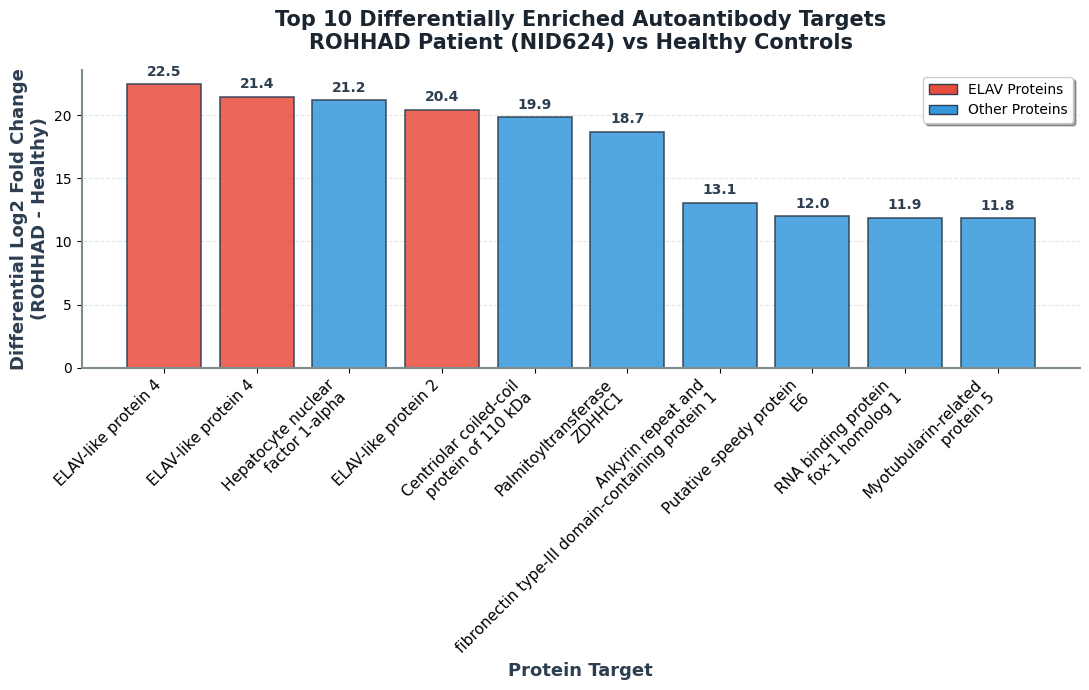


Summary Statistics:
   ELAV proteins found: 3
   Mean differential log2FC: 17.29
   Max differential log2FC: 22.46


In [41]:
# Bar plot comparing log2FC between ROHHAD and healthy controls (with broken x labels)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use the line-break style for plotting labels, similar to the top lollipop plot
def break_label(label, maxlen=24):
    """Insert line split into labels at the closest space before maxlen characters."""
    if len(label) <= maxlen:
        return label
    break_idx = label[:maxlen].rfind(' ')
    if break_idx == -1:
        break_idx = maxlen
    return label[:break_idx].rstrip() + '\n' + label[break_idx:].lstrip()

current_top_peptides = top_peptides[:10]
fragment_names = [peptide_to_clean_label[p] for p in current_top_peptides]
fragment_names_broken = [break_label(lbl) for lbl in fragment_names]

# Use log2FC columns (which actually exist in the data)
rohhad_log2fc_cols = [col for col in filtered_data.columns 
                      if "ROHHAD_NID624" in col and col.endswith("_log2fc_over_mockip")]
healthy_log2fc_cols = [col for col in filtered_data.columns 
                       if "HealthyCtrl" in col and col.endswith("_log2fc_over_mockip")]

# Calculate mean log2FC for each peptide
rohhad_mean = filtered_data.loc[current_top_peptides, rohhad_log2fc_cols].mean(axis=1)
healthy_mean = filtered_data.loc[current_top_peptides, healthy_log2fc_cols].mean(axis=1)

# Differential enrichment (ROHHAD - Healthy)
diff_log2fc = rohhad_mean - healthy_mean

# Create plot dataframe
plot_df = pd.DataFrame({
    "Protein Target": fragment_names,
    "Protein Target Broken": fragment_names_broken,
    "Differential Log2FC": diff_log2fc.values,
    "ROHHAD Mean": rohhad_mean.values,
    "Healthy Mean": healthy_mean.values
})

# Sort by differential enrichment (descending)
plot_df = plot_df.sort_values("Differential Log2FC", ascending=False).reset_index(drop=True)

# --- Create publication-quality figure ---
fig, ax = plt.subplots(figsize=(11, 7))

# Custom color palette - highlight ELAV proteins
colors = ['#E74C3C' if 'elav' in name.lower() else '#3498DB' for name in plot_df["Protein Target"]]

bars = ax.bar(
    range(len(plot_df)), 
    plot_df["Differential Log2FC"], 
    color=colors,
    edgecolor='#2C3E50',
    linewidth=1.2,
    alpha=0.85
)

# Add value labels on bars
for i, (val, bar) in enumerate(zip(plot_df["Differential Log2FC"], bars)):
    height = bar.get_height()
    ax.annotate(f'{val:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 4),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10, fontweight='bold', color='#2C3E50')

# Use broken labels for x-axis and rotate them for readability
ax.set_xticks(range(len(plot_df)))
ax.set_xticklabels(
    plot_df["Protein Target Broken"], 
    fontsize=11, 
    fontweight='medium', 
    linespacing=1.2, 
    ha='right', 
    rotation=45  # Rotates the x-axis labels by 45 degrees
)
ax.set_ylabel("Differential Log2 Fold Change\n(ROHHAD - Healthy)", fontsize=13, fontweight='bold', color='#2C3E50')
ax.set_xlabel("Protein Target", fontsize=13, fontweight='bold', color='#2C3E50')
ax.set_title("Top 10 Differentially Enriched Autoantibody Targets\nROHHAD Patient (NID624) vs Healthy Controls",
             fontsize=15, fontweight='bold', color='#1A252F', pad=15)

# Clean up spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color('#7F8C8D')
ax.spines['bottom'].set_color('#7F8C8D')

# Add grid
ax.yaxis.grid(True, linestyle='--', alpha=0.4, color='#BDC3C7')
ax.set_axisbelow(True)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#E74C3C', edgecolor='#2C3E50', label='ELAV Proteins'),
                   Patch(facecolor='#3498DB', edgecolor='#2C3E50', label='Other Proteins')]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"   ELAV proteins found: {sum(1 for name in plot_df['Protein Target'] if 'ELAV' in name.upper())}")
print(f"   Mean differential log2FC: {plot_df['Differential Log2FC'].mean():.2f}")
print(f"   Max differential log2FC: {plot_df['Differential Log2FC'].max():.2f}")


In [30]:
# Calculate diseased sample columns as specified
diseased_columns = [
    col for col in filtered_data.columns
    if "ROHHAD_NID624" in col and col.endswith("_log2fc_over_mockip")
]

# Use the previously defined top ten peptides (as in context/top10_peptide_hits_aa.fasta)
# If your 'top_peptides' variable contains the proper order, use top_peptides[:10] as before.
top10_peptides = top_peptides[:10]
top10_data = filtered_data.loc[top10_peptides, diseased_columns]

import pandas as pd

# For each peptide, compute the mean log2FC across those diseased samples (1 value per peptide)
top10_diseased_means = top10_data.mean(axis=1)

# Convert to a DataFrame for presentation (optional)
top10_diseased_means_df = pd.DataFrame(top10_diseased_means, columns=['Mean_log2FC_over_MockIP_ROHHAD_NID624'])

print("Mean log2FC over MockIP (ROHHAD_NID624) for top 10 peptides:")
print(top10_diseased_means_df)

Mean log2FC over MockIP (ROHHAD_NID624) for top 10 peptides:
                                                    Mean_log2FC_over_MockIP_ROHHAD_NID624
peptide                                                                                  
gi|767902862|ref|XP_011539191.1|_PREDICTED:_ELA...                              20.081168
gi|661567333|ref|NP_001138247.2|_ELAV-like_prot...                              21.544762
gi|807201167|ref|NP_001293108.1|_hepatocyte_nuc...                              20.614450
gi|767954646|ref|XP_011516085.1|_PREDICTED:_ELA...                              20.567734
gi|190341065|ref|NP_055526.3|_centriolar_coiled...                              20.369565
gi|24307963|ref|NP_037436.1|_probable_palmitoyl...                              15.619710
gi|767993815|ref|XP_011522734.1|_PREDICTED:_ank...                               8.432029
gi|767898270|ref|XP_011507076.1|_PREDICTED:_put...                              11.188733
gi|530408284|ref|XP_005255450.1|_PREDIC

In [42]:
# Calculate the average raw RPK (reads per kilobase) for each peptide across all ROHHAD_NID624 samples
# NOTE: The data contains RPK values, not percent_reads columns. Using raw sample columns instead.

import pandas as pd

# Find columns corresponding to ROHHAD_NID624 raw samples (not the computed log2FC columns)
rohhad_raw_columns = [
    col for col in filtered_data.columns
    if "ROHHAD_NID624" in col and not col.endswith("_log2fc_over_mockip")
]

healthy_raw_columns = [
    col for col in filtered_data.columns
    if "HealthyCtrl" in col and not col.endswith("_log2fc_over_mockip")
]

print(f"Found {len(rohhad_raw_columns)} ROHHAD raw sample columns")
print(f"Found {len(healthy_raw_columns)} Healthy raw sample columns")

if rohhad_raw_columns:
    # Calculate mean RPK across ROHHAD samples for each peptide
    rohhad_avg_rpk = filtered_data[rohhad_raw_columns].mean(axis=1)
    healthy_avg_rpk = filtered_data[healthy_raw_columns].mean(axis=1) if healthy_raw_columns else pd.Series(0, index=filtered_data.index)
    
    # Show summary statistics
    print("\nRPK Summary Statistics (ROHHAD vs Healthy):")
    print(f"   ROHHAD Mean RPK across all peptides: {rohhad_avg_rpk.mean():.4f}")
    print(f"   Healthy Mean RPK across all peptides: {healthy_avg_rpk.mean():.4f}")
    print(f"   Max ROHHAD RPK: {rohhad_avg_rpk.max():.4f}")
    
    # Show top 10 peptides by ROHHAD RPK
    print("\nTop 10 Peptides by Mean ROHHAD RPK:")
    top_rpk = rohhad_avg_rpk.nlargest(10)
    for i, (pep, val) in enumerate(top_rpk.items(), 1):
        short_name = pep.split('|')[-1][:50] if '|' in pep else pep[:50]
        print(f"   {i}. {short_name}... : {val:.4f}")
else:
    print("Warning: No raw ROHHAD sample columns found in filtered_data.")
    print("   Available columns ending patterns:")
    col_endings = set(col.split('_')[-1] if '_' in col else col for col in filtered_data.columns[:20])
    print(f"   {col_endings}")


Found 2 ROHHAD raw sample columns
Found 63 Healthy raw sample columns

RPK Summary Statistics (ROHHAD vs Healthy):
   ROHHAD Mean RPK across all peptides: 28.0760
   Healthy Mean RPK across all peptides: 21.3359
   Max ROHHAD RPK: 32043.8341

Top 10 Peptides by Mean ROHHAD RPK:
   1. _PREDICTED:_ELAV-like_protein_2_isoform_X7_[Homo_s... : 32043.8341
   2. _hepatocyte_nuclear_factor_1-alpha_isoform_1_[Homo... : 20801.4702
   3. _PREDICTED:_ELAV-like_protein_4_isoform_X1_[Homo_s... : 16833.7746
   4. _probable_palmitoyltransferase_ZDHHC1_[Homo_sapien... : 5350.4216
   5. _ELAV-like_protein_4_isoform_3_[Homo_sapiens]_frag... : 3892.1800
   6. _tyrosyl-DNA_phosphodiesterase_1_[Homo_sapiens]_fr... : 2506.3331
   7. _PREDICTED:_ELAV-like_protein_2_isoform_X7_[Homo_s... : 1909.5886
   8. _centriolar_coiled-coil_protein_of_110_kDa_isoform... : 1508.2224
   9. _PREDICTED:_zinc_finger_CCCH_domain-containing_pro... : 422.4502
   10. _cytospin-A_isoform_1_[Homo_sapiens]_fragment_5... : 139.1252
